In [138]:
# Import PyTorch core libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Import torchvision for datasets and transforms
import torchvision
import torchvision.transforms as transforms

# Import DataLoader for batching
from torch.utils.data import DataLoader

In [139]:
# Define transformations for the dataset (convert to tensor and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

# Download and load the training dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Download and load the test dataset
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Number of training samples: 60000
Number of test samples: 10000


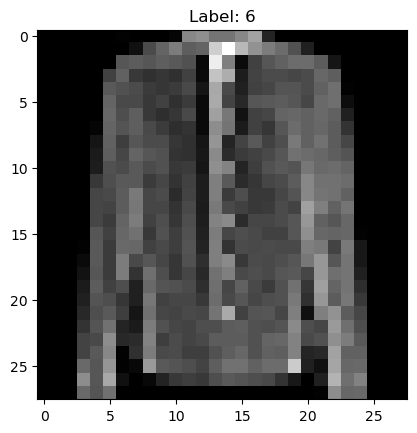

In [140]:
# Check the number of samples in the training and test datasets
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

# Visualize a sample image and its label
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"Label: {labels[0].item()}")
plt.show()

In [141]:
# Improved Feedforward Neural Network with more neurons and an extra hidden layer
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.relu1 = nn.LeakyReLU(0.01)
        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.relu2 = nn.LeakyReLU(0.01)
        self.fc3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.relu3 = nn.LeakyReLU(0.01)
        self.fc4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.relu4 = nn.LeakyReLU(0.01)
        self.fc5 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

        # Weight initialization
        nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc3.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc4.weight, nonlinearity='relu')

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        return x

In [142]:
# Instantiate the model
model = FeedforwardNN()
print(model)

FeedforwardNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [143]:
model.to('cuda' if torch.cuda.is_available() else 'cpu')

FeedforwardNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [144]:
# Print the device the model is on
print(next(model.parameters()).device)

cpu


In [145]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

# Training loop
num_epochs = 60
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/60], Loss: 0.8213
Epoch [2/60], Loss: 0.4471
Epoch [3/60], Loss: 0.3859
Epoch [4/60], Loss: 0.3501
Epoch [5/60], Loss: 0.3275
Epoch [6/60], Loss: 0.3095
Epoch [7/60], Loss: 0.2954
Epoch [8/60], Loss: 0.2829
Epoch [9/60], Loss: 0.2681
Epoch [10/60], Loss: 0.2561
Epoch [11/60], Loss: 0.2498
Epoch [12/60], Loss: 0.2388
Epoch [13/60], Loss: 0.2310
Epoch [14/60], Loss: 0.2208
Epoch [15/60], Loss: 0.2145
Epoch [16/60], Loss: 0.2090
Epoch [17/60], Loss: 0.2025
Epoch [18/60], Loss: 0.1951
Epoch [19/60], Loss: 0.1888
Epoch [20/60], Loss: 0.1840
Epoch [21/60], Loss: 0.1769
Epoch [22/60], Loss: 0.1717
Epoch [23/60], Loss: 0.1672
Epoch [24/60], Loss: 0.1626
Epoch [25/60], Loss: 0.1580
Epoch [26/60], Loss: 0.1498
Epoch [27/60], Loss: 0.1494
Epoch [28/60], Loss: 0.1459
Epoch [29/60], Loss: 0.1417
Epoch [30/60], Loss: 0.1355
Epoch [31/60], Loss: 0.1323
Epoch [32/60], Loss: 0.1322
Epoch [33/60], Loss: 0.1286
Epoch [34/60], Loss: 0.1212
Epoch [35/60], Loss: 0.1194
Epoch [36/60], Loss: 0.1126
E

In [146]:
# Evaluate test accuracy after training
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 90.37%
